# 概率与概率分布

In [38]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

## 概率

In [2]:
data = pd.read_excel('data/例5.1.xlsx')
data.head()

,分公司,男职工,女职工,合计
0,电脑公司,4400,1800,6200
1,手机公司,3200,1600,4800
2,半导体公司,900,600,1500
3,合 计,8500,4000,12500


1.抽取一人为男性的概率  
P(A) = 男职工/ 合计

In [3]:
PA = 8500/ 12500
PA

0.68

2.抽中的手机公司的职工的概率

In [4]:
PB = 4800/12500
PB

0.384

## 离散型随机变量

### 数学期望

In [5]:
data2 = np.array([1,2,3,4,5,6])
p2 = 1/6
E = np.sum(p2*data2)
E

3.5

### 方差

In [6]:
np.sum((data2-E)**2*p2)

2.9166666666666665

In [7]:
D = np.sum(p2*(data2**2)) -E**2

In [8]:
sigma = D**0.5
sigma

1.707825127659933

### 离散系数

In [9]:
V = sigma/E 
V

0.48795003647426655

### 均值和方差财务分析中的应用

In [10]:
data3 = pd.read_excel('data/例5.6.xlsx',head = 0)
l= len(data3)
data3 = data3.drop([l-1])
data3.head(10)

,持有期回报率x(%),可能性（概率）p(x),Unnamed: 2
0,4,0.05,0.2
1,5,0.10,0.5
2,6,0.15,0.9
3,7,0.40,2.8
4,8,0.15,1.2
5,9,0.10,0.9
6,10,0.05,0.5


In [11]:
E3 =np.sum( data3.values[:,0] *data3.values[:,1])
E3

7.000000000000001

In [12]:
D3 =np.sum( (data3.values[:,0]-E)**2 *data3.values[:,1])
sigma3 = D3**0.5
sigma3

3.774917217635375

In [13]:
V3 = sigma3/E3
V3

0.5392738882336249

In [14]:
data4 = np.array([5.5,6.5,7.5,8.5])
p4 = .25

In [15]:
E4 = np.sum((data4)*p4)

In [16]:
sigma4 = (np.sum(p4*(data4**2)) -E4**2)**.5
sigma4

1.118033988749895

In [17]:
V4 = sigma4/E4
V4

0.15971914124998499

In [18]:
print("A 期望"+ str(E3))
print("B 期望"+ str(E4))
print("A 标准差"+ str(sigma3))
print("B 标准差"+ str(sigma4))
print("A 离散系数"+ str(V3))
print("B 离散系数"+ str(V4))
print("B 稳定")

A 期望7.000000000000001
B 期望7.0
A 标准差3.774917217635375
B 标准差1.118033988749895
A 离散系数0.5392738882336249
B 离散系数0.15971914124998499
B 稳定


#### 二项分布
已知100件中有5件次品，现取1件，有放回的取3次，求其中有两次是次品的概率：

In [19]:
from scipy.special import comb, perm

In [20]:
P_x_2 = comb(3,2)*(0.05)**2 *(0.95)
P_x_2

0.007125000000000001

不放回 ----- 超几何分布 Pm = (C(M,m)*C(n-m.N-M))/C(N,n)

In [21]:
P_x_2_no = comb(5,3)*comb(95,1) / comb(100,3)
P_x_2_no

0.005875077303648732

#### 泊松分布

假设请假人数X近似服从泊松分布，设周一请假的平均数为2.5,求请假是5人的概率

In [22]:
import math
E5 = D5 = 2.5

In [23]:
sigma5 = D5**0.5
sigma5

1.5811388300841898

In [24]:
# factorial 阶乘 
p5 =( (2.5)**5*math.e**(-2.5)) / np.math.factorial(5)
p5

0.06680094289054264

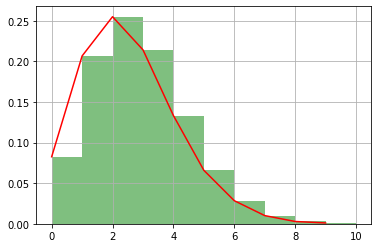

In [25]:
 # Poisson分布lam为λ size为k
x = np.random.poisson(lam=2.5, size=100000)
a = plt.hist(x, bins= 10, density=True, range=[0, 10], color='g', alpha=0.5)
plt.plot(a[1][0:10], a[0], 'r')
plt.grid()
plt.show()

已知某批集成电路的次品率为1.5%,随机抽取1000块集成电路进行检验, 求次品数为0,1,2，3件的概率

0.015<0.25, n>20, np = 1.5<5 用泊松分布

In [31]:
def poisson(l ,x):
    a = (l**x)*(math.e**(-l))
    b = np.math.factorial(x)
    return  a/b

In [34]:
p6_0 = poisson(1.5 , 0)
print(p6_0)
p6_1 = poisson(1.5 , 1)
print(p6_1)
p6_2 = poisson(1.5 , 2)
print(p6_2)
p6_3 = poisson(1.5 , 3)
print(p6_3)

0.22313016014842985
0.33469524022264474
0.2510214301669836
0.1255107150834918


### 正太分布

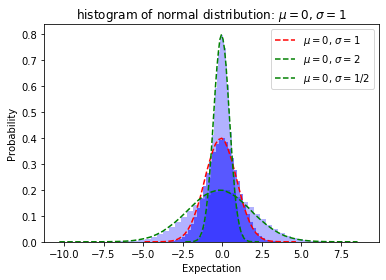

In [87]:
mu, sigma , num_bins = 0, 1, 50
x = mu + sigma * np.random.randn(1000000)
# 正态分布的数据
a = plt.hist(x, num_bins, density=True, facecolor = 'blue', alpha = 0.5)
plt.plot(a[1][0:50], a[0], 'r--',label='$\mu = 0$, $\sigma=1$')

mu, sigma  = 0, 2
x1 = mu + sigma * np.random.randn(1000000)
a1 = plt.hist(x1, num_bins, density=True, facecolor = 'blue', alpha = 0.3)
plt.plot(a1[1][0:50], a1[0], 'g--',label='$\mu = 0$, $\sigma=2$')

mu, sigma  = 0, 0.5
x2 = mu + sigma * np.random.randn(1000000)
a2 = plt.hist(x2, num_bins, density=True, facecolor = 'blue', alpha = 0.3)
plt.plot(a2[1][0:50], a2[0], 'g--',label='$\mu = 0$, $\sigma=1/2$')


plt.xlabel('Expectation')
plt.ylabel('Probability')
plt.legend()
plt.title('histogram of normal distribution: $\mu = 0$, $\sigma=1$')
plt.show()
